<a href="https://www.kaggle.com/code/blurred8216/financial-indicators-of-us-recessions?scriptVersionId=127001233" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-recession-and-financial-indicators/Sticky Price Consumer Price Index less Food and Energy.csv
/kaggle/input/us-recession-and-financial-indicators/Total Unemployed Plus All Persons Marginally Attached to the Labor Force Plus Total Employed Part Time for Economic Reasons.csv
/kaggle/input/us-recession-and-financial-indicators/Bank Credit All Commercial Banks.csv
/kaggle/input/us-recession-and-financial-indicators/Delinquency Rate on Credit Card Loans All Commercial Banks.csv
/kaggle/input/us-recession-and-financial-indicators/Financial_Indicators.csv
/kaggle/input/us-recession-and-financial-indicators/Commercial Real Estate Prices for United States.csv
/kaggle/input/us-recession-and-financial-indicators/Financial_Indicators_Information.pdf
/kaggle/input/us-recession-and-financial-indicators/Federal Funds Effective Rate.csv
/kaggle/input/us-recession-and-financial-indicators/Continued Claims (Insured Unemployment).csv
/kaggle/input/us-recession-and-financial-indicators/Re

### Please suggest me some ideas How should I proceed from here?

# Financial Indicators of US Recession

- Can Be used to predict the impact of the next recession on the US Economy
- Three Tables i) Financial_indicators, ii) SPX500 iii) NASDAQ
* Financial Indicators (Predictors for Economic Effect)
    * Federal Funds Rate
    * Gross Domestic Product
    * Real Gross Domestic Product
    * Price Indices
    * Inflation
    * Unemployment levels
    * continuing claims for unemployment benefits
    * bank credit
    * consumer credit
    * money supply
    * and real estate loans
    * prices
    * credit card delinquency rates   
* SPX500 and NASDAQ (how the stock market will affect the trends)
    * daily stock market data
    * High and low Price for each day


In [2]:
import os

In [3]:
file_path = "/kaggle/input/us-recession-and-financial-indicators"
file_name = list(os.listdir(file_path))
file_name

['Sticky Price Consumer Price Index less Food and Energy.csv',
 'Total Unemployed Plus All Persons Marginally Attached to the Labor Force Plus Total Employed Part Time for Economic Reasons.csv',
 'Bank Credit All Commercial Banks.csv',
 'Delinquency Rate on Credit Card Loans All Commercial Banks.csv',
 'Financial_Indicators.csv',
 'Commercial Real Estate Prices for United States.csv',
 'Financial_Indicators_Information.pdf',
 'Federal Funds Effective Rate.csv',
 'Continued Claims (Insured Unemployment).csv',
 'Real Estate Loans Residential Real Estate Loans Revolving Home Equity Loans All Commercial Banks.csv',
 'Consumer Price Index Total All Items for the United States.csv',
 'Households Owners Equity in Real Estate Level.csv',
 'M1.csv',
 'Median Consumer Price Index.csv',
 'Real Estate Loans Commercial Real Estate Loans All Commercial Banks.csv',
 'Sticky Price Consumer Price Index.csv',
 'Gross Domestic Product.csv',
 'M2.csv',
 'SPX500.csv',
 'NASDAQ.csv',
 'Unemployment Level.cs

In [4]:
file_name = [file for file in file_name if file!='Financial_Indicators_Information.pdf']
file_name

['Sticky Price Consumer Price Index less Food and Energy.csv',
 'Total Unemployed Plus All Persons Marginally Attached to the Labor Force Plus Total Employed Part Time for Economic Reasons.csv',
 'Bank Credit All Commercial Banks.csv',
 'Delinquency Rate on Credit Card Loans All Commercial Banks.csv',
 'Financial_Indicators.csv',
 'Commercial Real Estate Prices for United States.csv',
 'Federal Funds Effective Rate.csv',
 'Continued Claims (Insured Unemployment).csv',
 'Real Estate Loans Residential Real Estate Loans Revolving Home Equity Loans All Commercial Banks.csv',
 'Consumer Price Index Total All Items for the United States.csv',
 'Households Owners Equity in Real Estate Level.csv',
 'M1.csv',
 'Median Consumer Price Index.csv',
 'Real Estate Loans Commercial Real Estate Loans All Commercial Banks.csv',
 'Sticky Price Consumer Price Index.csv',
 'Gross Domestic Product.csv',
 'M2.csv',
 'SPX500.csv',
 'NASDAQ.csv',
 'Unemployment Level.csv',
 'Consumer Price Index for All Urban 

In [5]:
import pandas as pd
import glob

path = r'/kaggle/input/us-recession-and-financial-indicators/' # path of the folder where CSV files are stored
all_files = glob.glob(path + "/*.csv")

df_list= []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df_list.append(df)



In [6]:

#before Column name is Capitalize
print(df_list[17].columns)

# converting all the column header to capital letter
for i in df_list:
    i.columns =  i.columns.str.upper()
    
#After Column name is Capitalize
print(df_list[17].columns)


Index(['Date', 'Open', 'High', 'Low'], dtype='object')
Index(['DATE', 'OPEN', 'HIGH', 'LOW'], dtype='object')


In [7]:
#creating metadata which will contain file_name, columns header, range of data
df_metadata = pd.DataFrame(file_name,columns=["File_Name"])

#collection of all column header of each and every file
df_header_list = []
for i in range(len(df_list)):
    df_header_list.append(list(df_list[i].columns))
    
min_date_list = []
max_date_list = []
for i in range(26):
    min_date_list.append(df_list[i]["DATE"].min())
    max_date_list.append(df_list[i]["DATE"].max())
    


df_metadata["Columns"] = df_header_list
df_metadata["min_date"] = min_date_list
df_metadata["max_date"] = max_date_list
df_metadata

,File_Name,Columns,min_date,max_date
0,Sticky Price Consumer Price Index less Food an...,"[DATE, CORESTICKM159SFRBATL]",1967-12-01,2023-03-01
1,Total Unemployed Plus All Persons Marginally A...,"[DATE, U6RATE]",1994-01-01,2023-03-01
2,Bank Credit All Commercial Banks.csv,"[DATE, TOTBKCR]",1973-01-03,2023-03-29
3,Delinquency Rate on Credit Card Loans All Comm...,"[DATE, DRCCLACBS]",1991-01-01,2022-10-01
4,Financial_Indicators.csv,"[DATE, FED_FUNDS_RATE, GDP, REAL_GDP, STICKY_P...",1945-10-01,2023-03-29
5,Commercial Real Estate Prices for United State...,"[DATE, COMREPUSQ159N]",2005-01-01,2022-04-01
6,Federal Funds Effective Rate.csv,"[DATE, FEDFUNDS]",1954-07-01,2023-03-01
7,Continued Claims (Insured Unemployment).csv,"[DATE, CCSA]",1967-01-07,2023-03-25
8,Real Estate Loans Residential Real Estate Loan...,"[DATE, RHEACBW027SBOG]",1987-06-17,2023-03-29
9,Consumer Price Index Total All Items for the U...,"[DATE, CPALTT01USM657N]",1960-01-01,2023-01-01


In [8]:
# for i in range(26):
#     print(df_list[i].head(5))
#     print("\n\n")

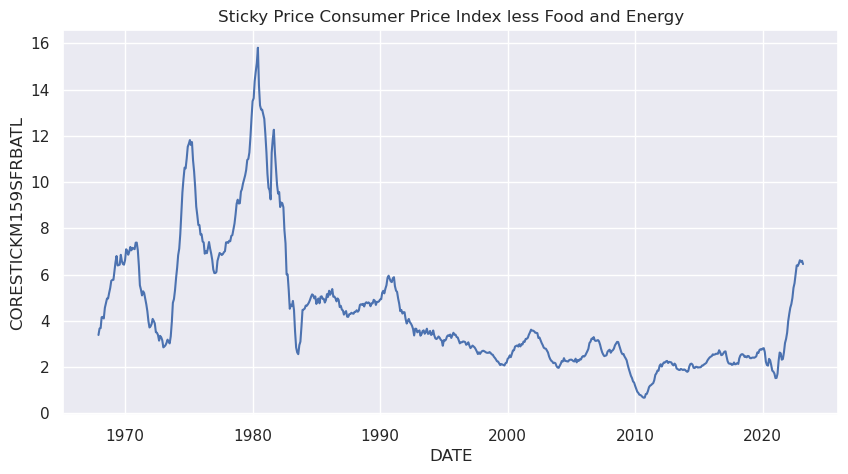

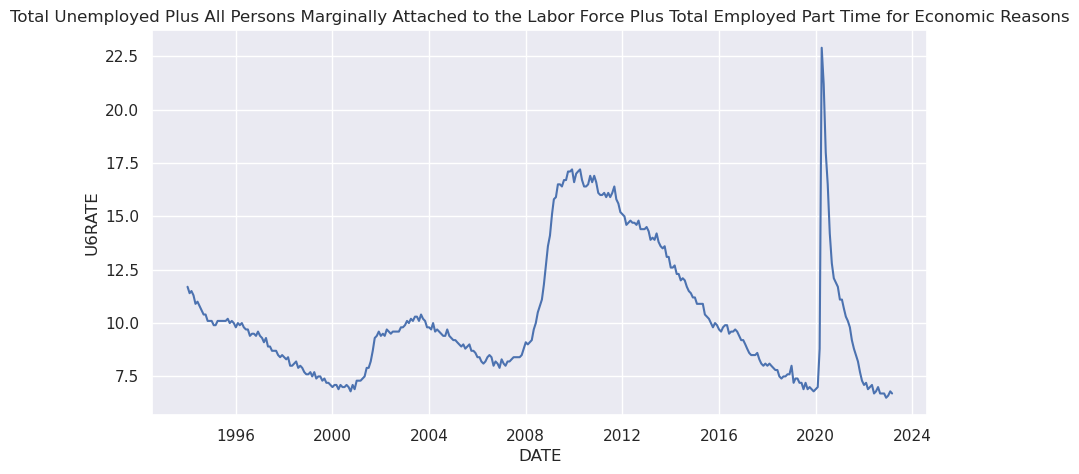

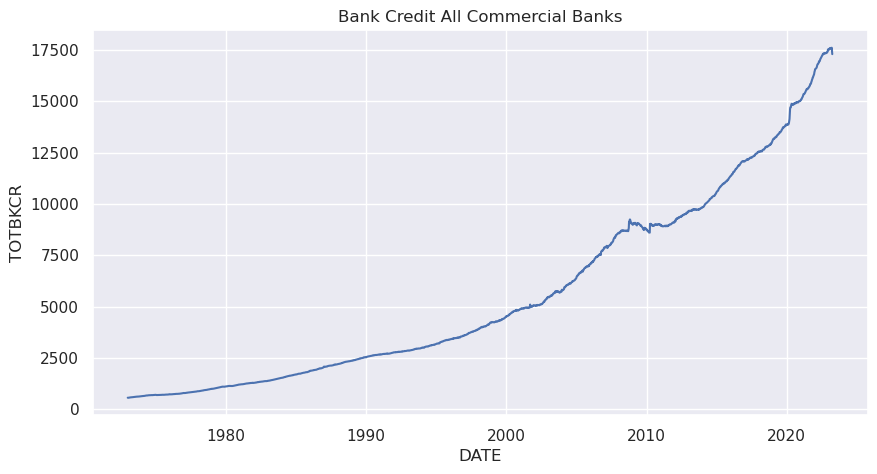

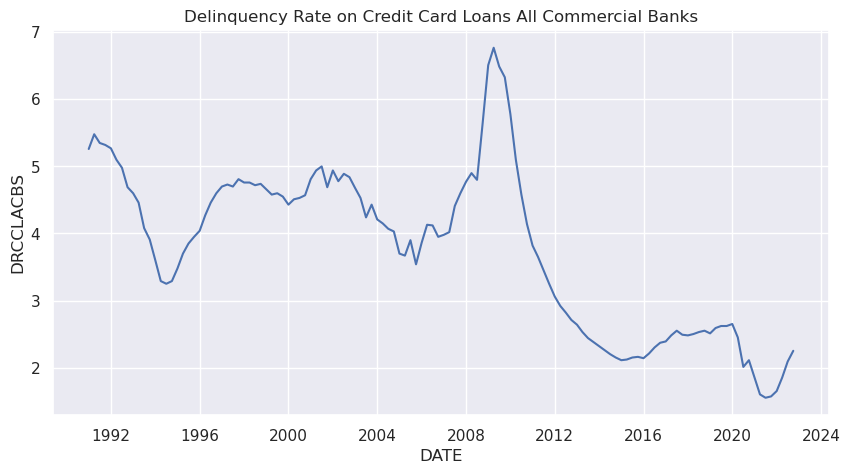

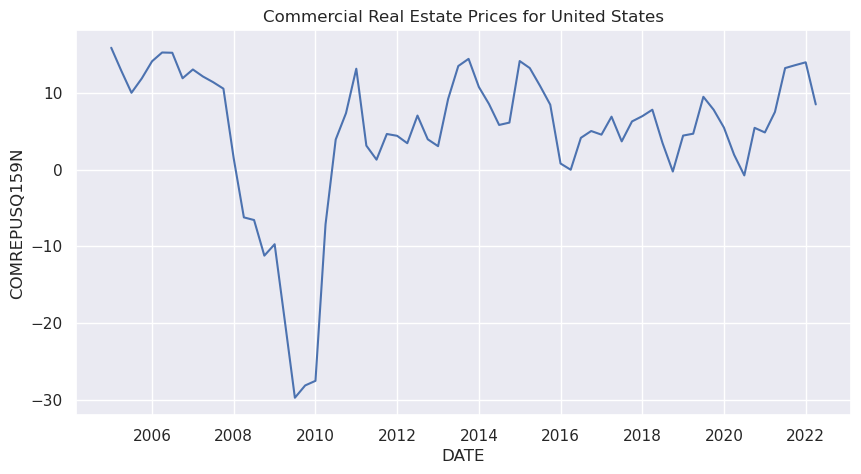

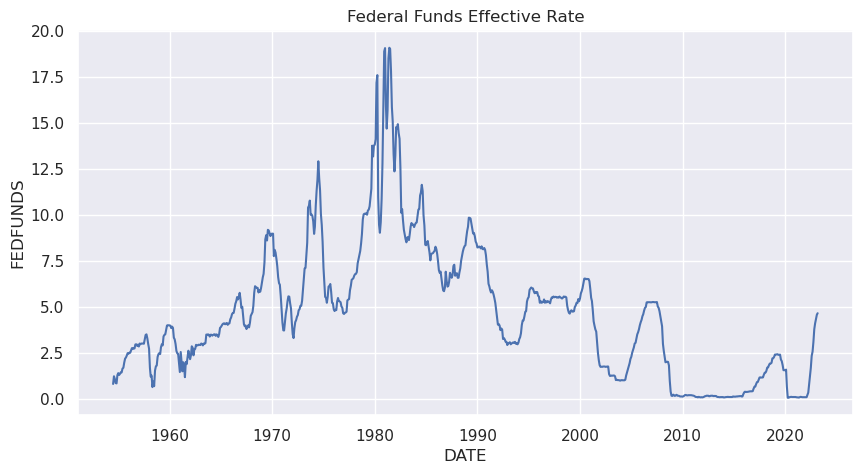

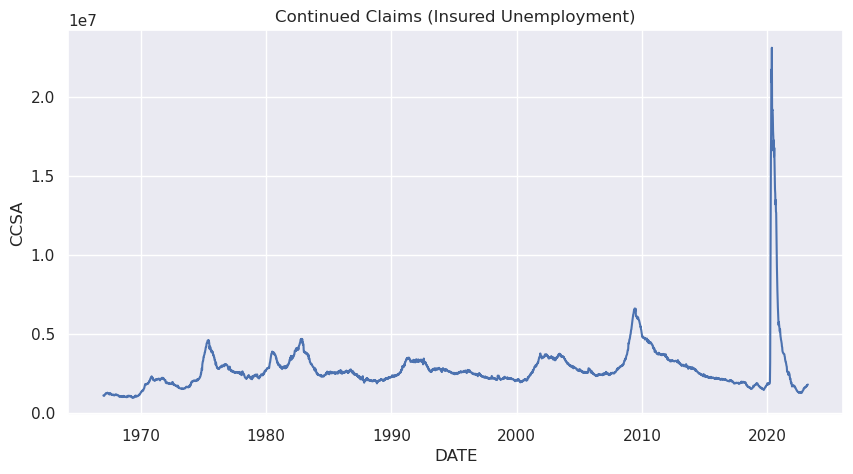

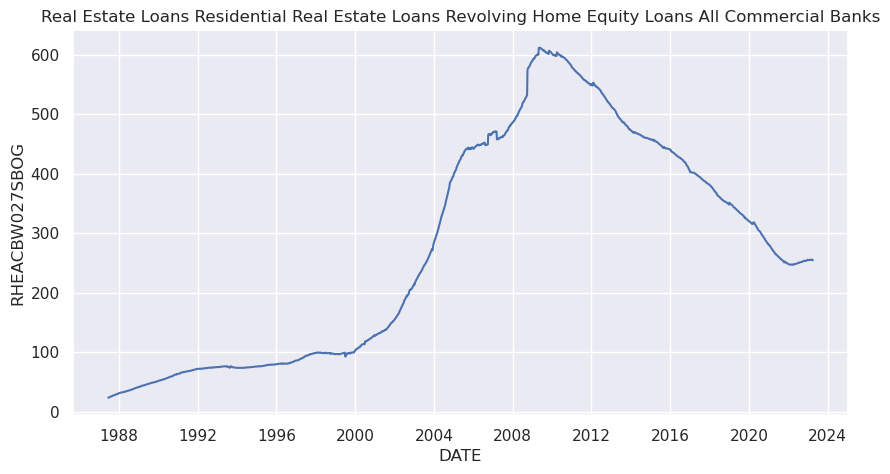

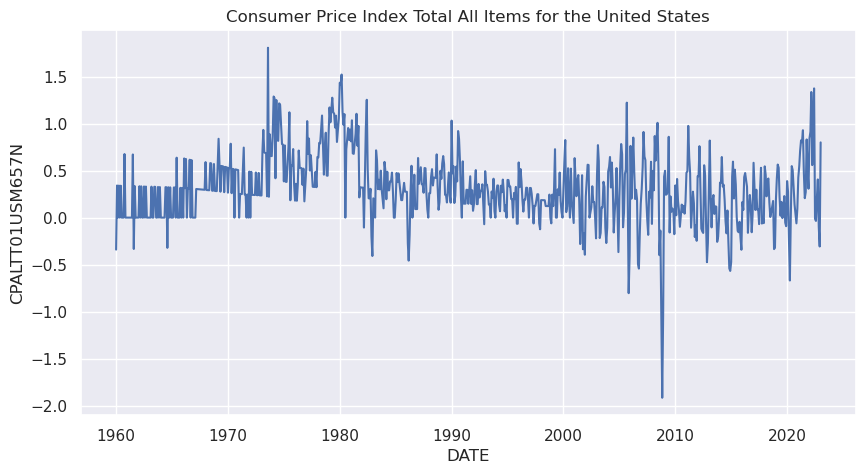

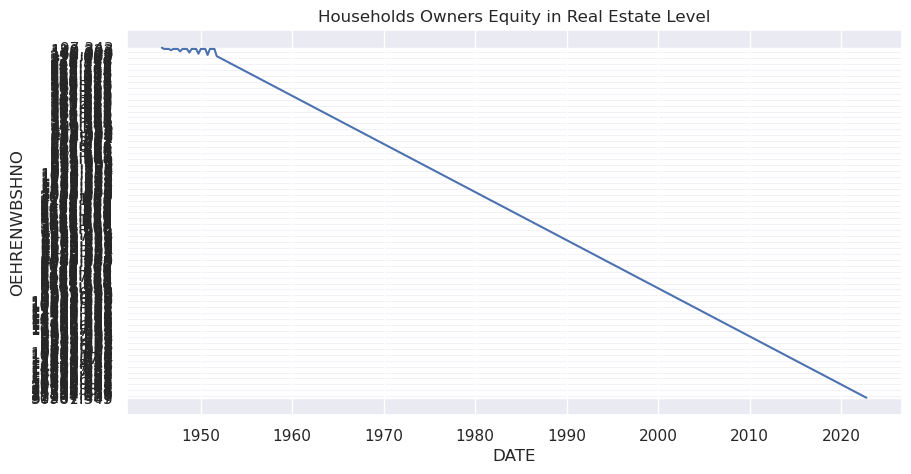

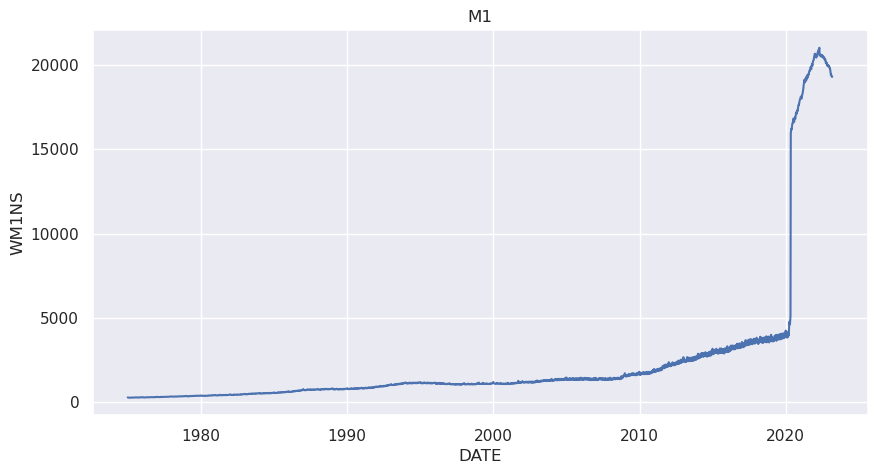

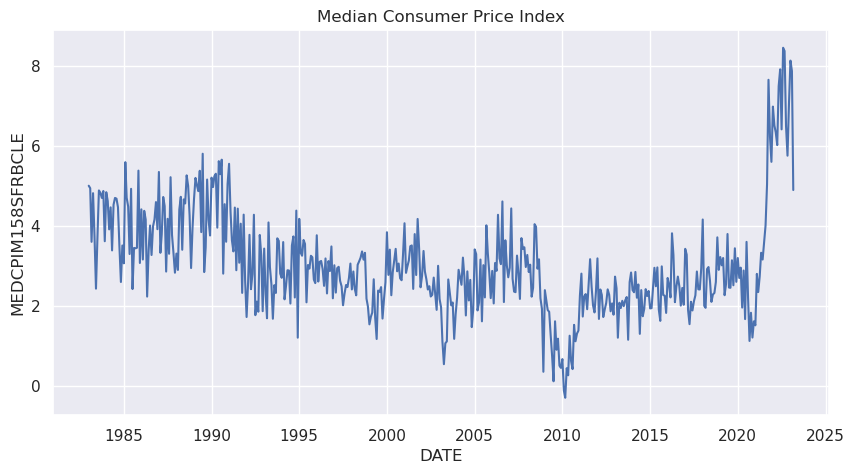

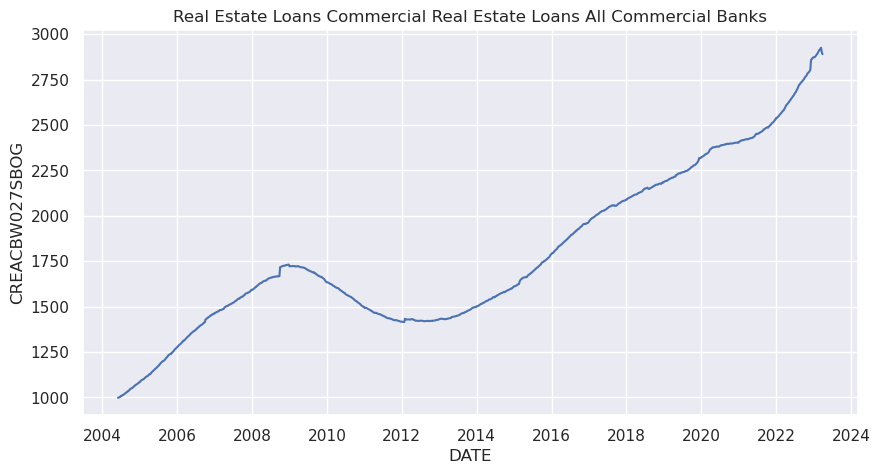

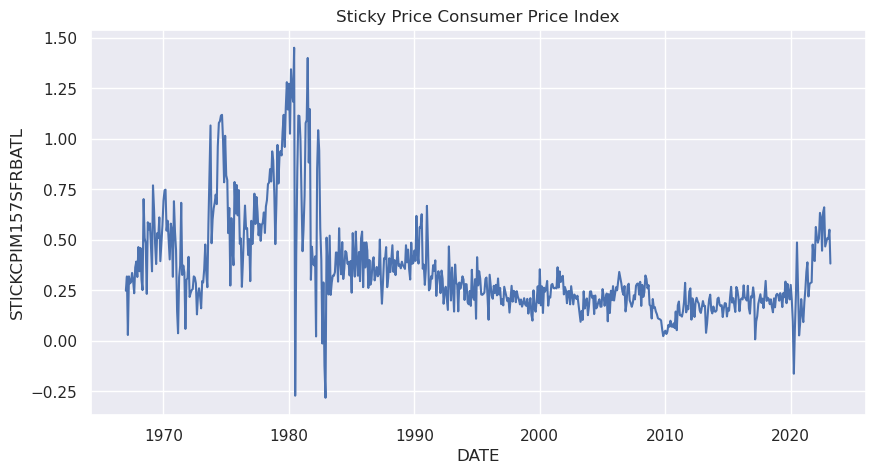

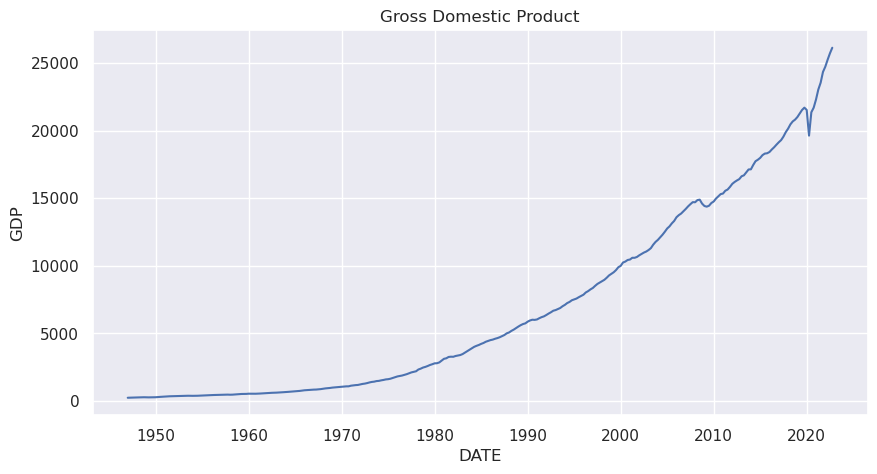

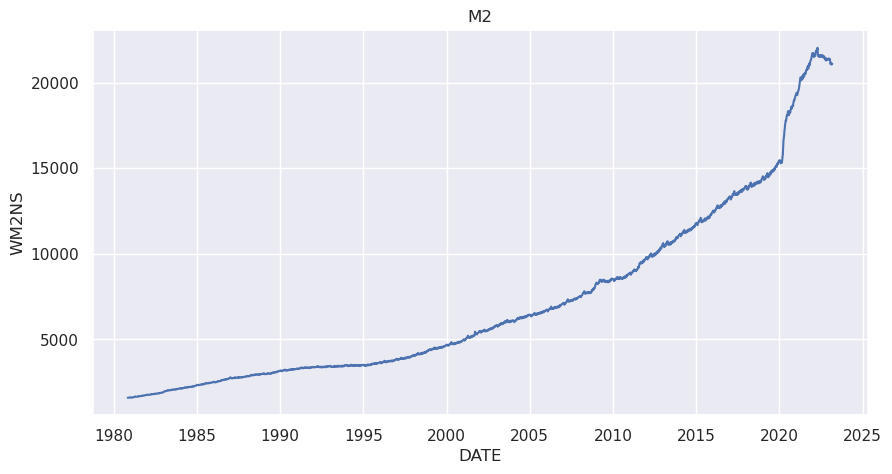

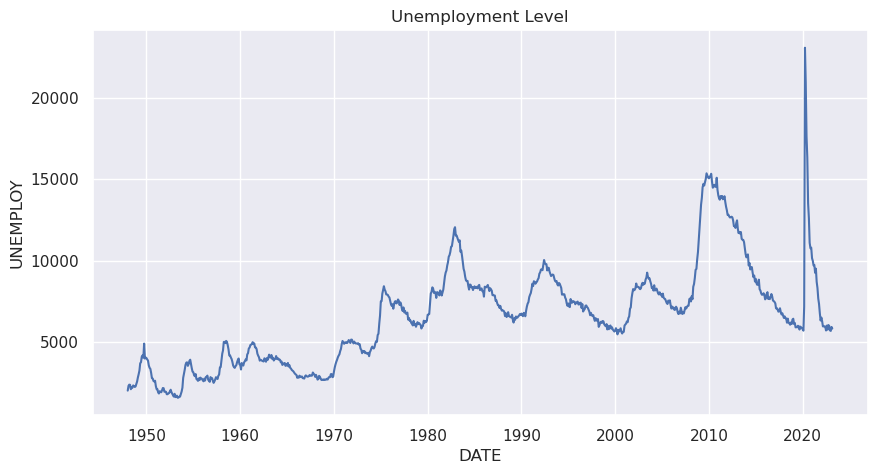

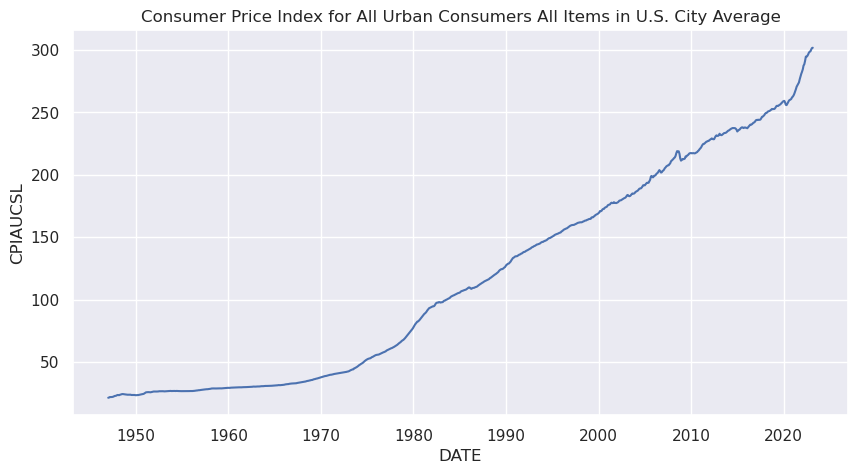

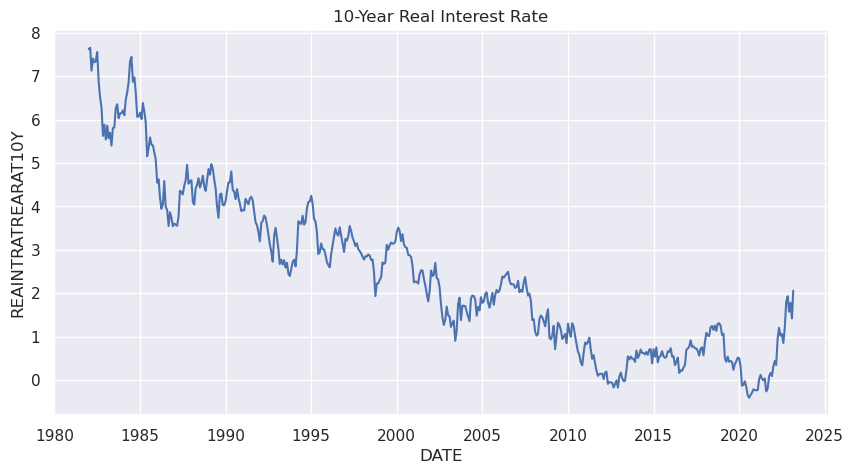

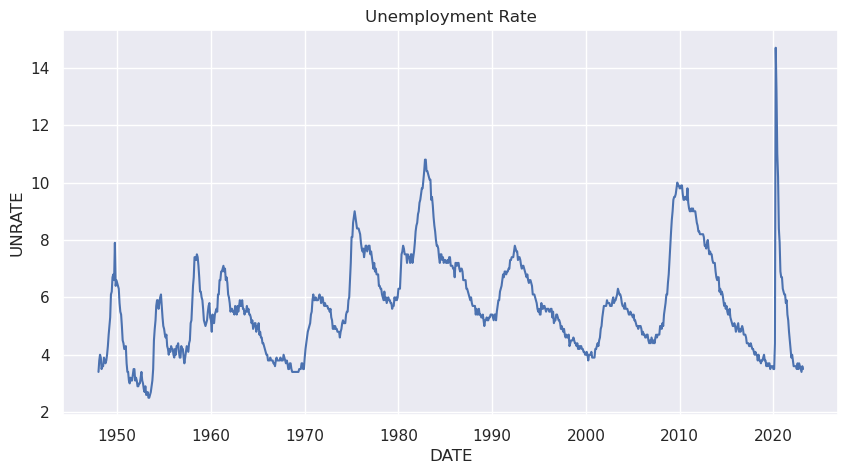

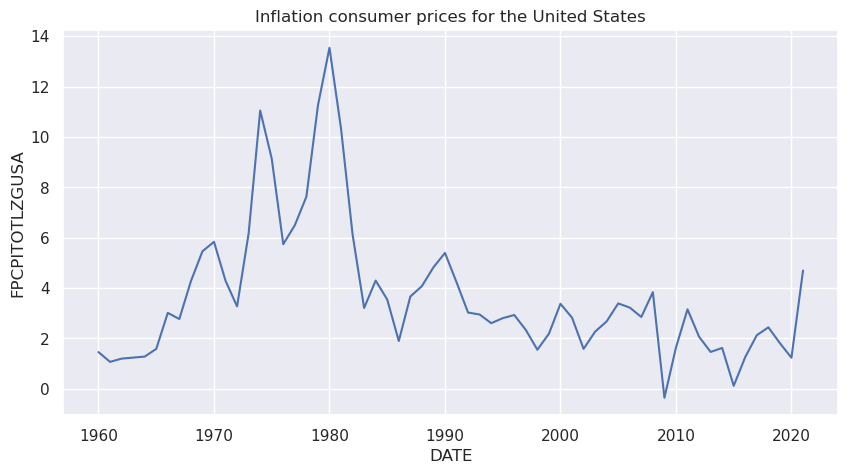

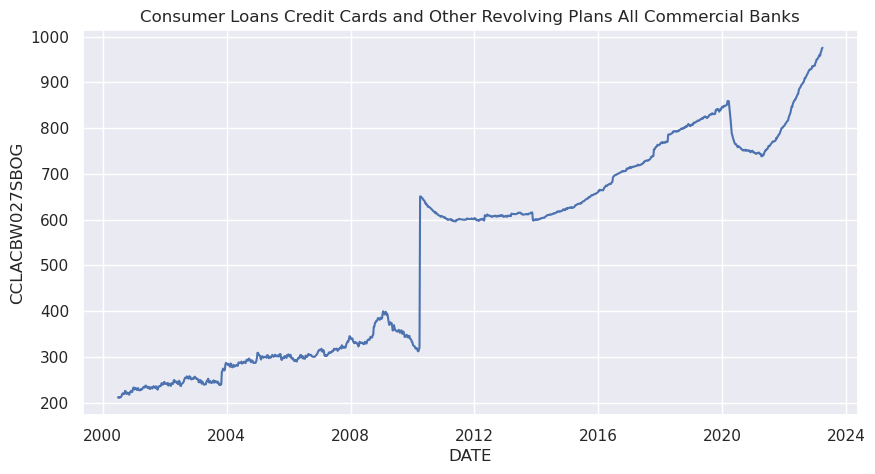

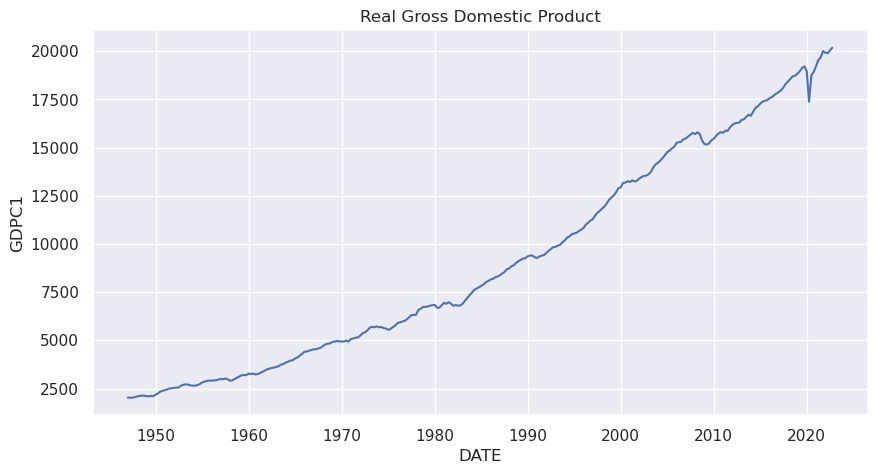

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# fig, axs = plt.subplots(ncols=5)
for i in range(26):
    if i not in (4,17,18):
        # plot the time series chart and customize it
        metadata = df_metadata.iloc[i] #contains metadate for the dataframe
        df = df_list[i]

        # convert the date column to a datetime object and set it as the index
        df['DATE'] = pd.to_datetime(df['DATE'])

        column_list = metadata[1] # Column_list contains column name

        sns.set(style='darkgrid')
        plt.figure(figsize=(10, 5))
        # plot the time series chart using Seaborn
        sns.lineplot(x=column_list[0], y=column_list[1], data=df)
        plt.title(metadata[0].replace(".csv",""))
        plt.xlabel(column_list[0])
        plt.ylabel(column_list[1])
        plt.show()



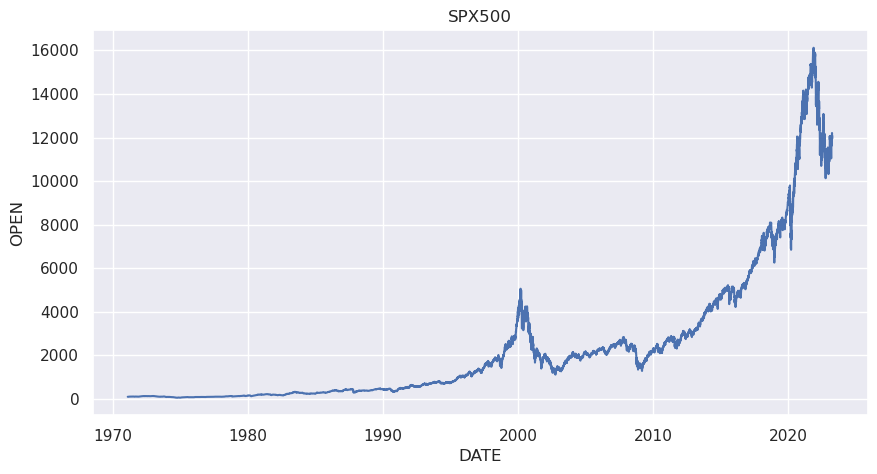

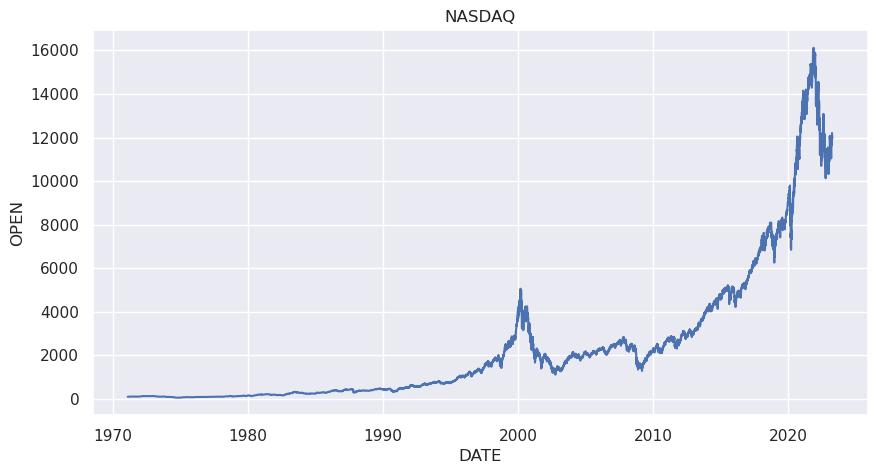

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# fig, axs = plt.subplots(ncols=5)
for i in range(26):
    if i in (17,18):
        # plot the time series chart and customize it
        metadata = df_metadata.iloc[i] #contains metadate for the dataframe
        df = df_list[i]

        # convert the date column to a datetime object and set it as the index
        df['DATE'] = pd.to_datetime(df['DATE'])

        column_list = metadata[1] # Column_list contains column name

        sns.set(style='darkgrid')
        plt.figure(figsize=(10, 5))
        # plot the time series chart using Seaborn
        sns.lineplot(x=column_list[0], y=column_list[1], data=df)
        plt.title(metadata[0].replace(".csv",""))
        plt.xlabel(column_list[0])
        plt.ylabel(column_list[1])
        plt.show()

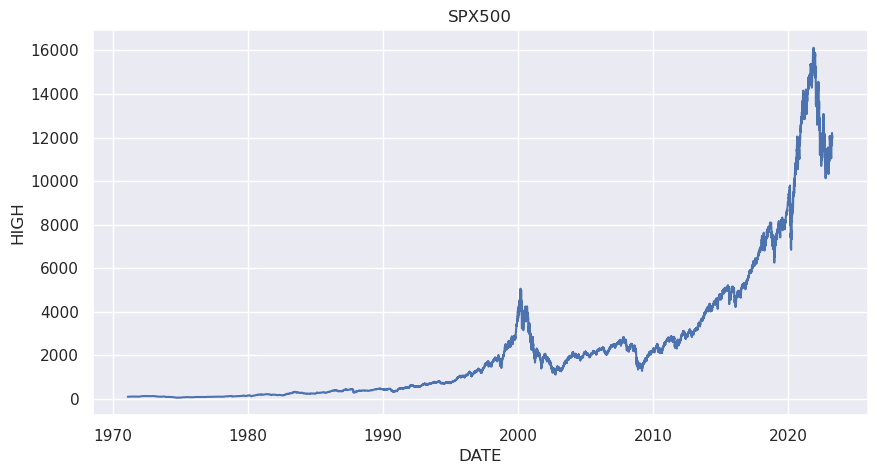

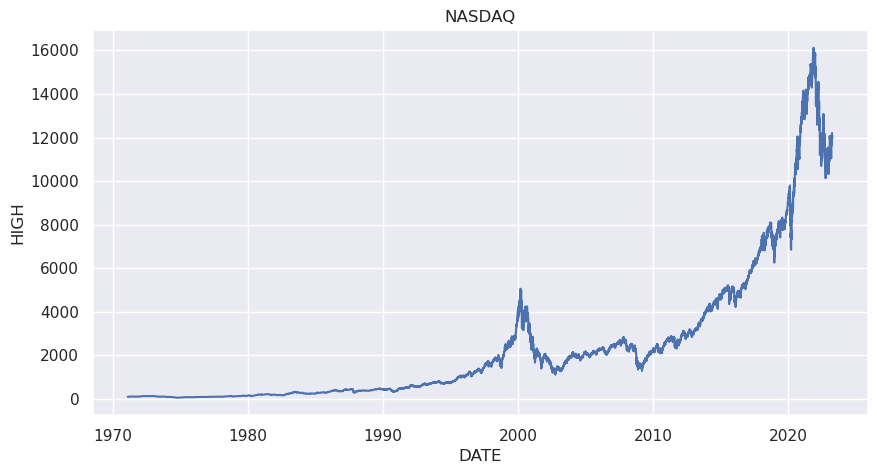

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# fig, axs = plt.subplots(ncols=5)
for i in range(26):
    if i in (17,18):
        # plot the time series chart and customize it
        metadata = df_metadata.iloc[i] #contains metadate for the dataframe
        df = df_list[i]

        # convert the date column to a datetime object and set it as the index
        df['DATE'] = pd.to_datetime(df['DATE'])

        column_list = metadata[1] # Column_list contains column name

        sns.set(style='darkgrid')
        plt.figure(figsize=(10, 5))
        # plot the time series chart using Seaborn
        sns.lineplot(x=column_list[0], y=column_list[1], data=df)
        plt.title(metadata[0].replace(".csv",""))
        plt.xlabel(column_list[0])
        plt.ylabel(column_list[2])
        plt.show()